In [1]:

import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [3]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [4]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

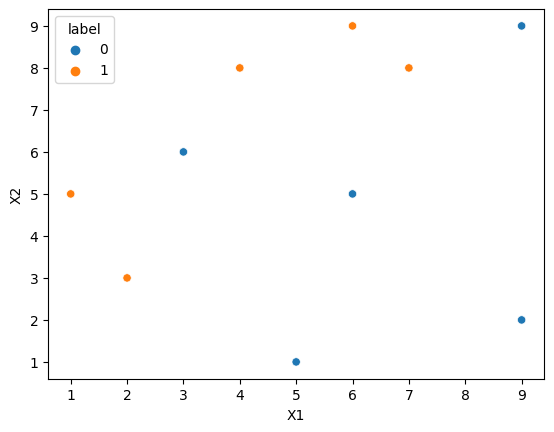

In [6]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [9]:
df['weights'] = 1/df.shape[0]

In [10]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:

from sklearn.tree import DecisionTreeClassifier

In [12]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [14]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

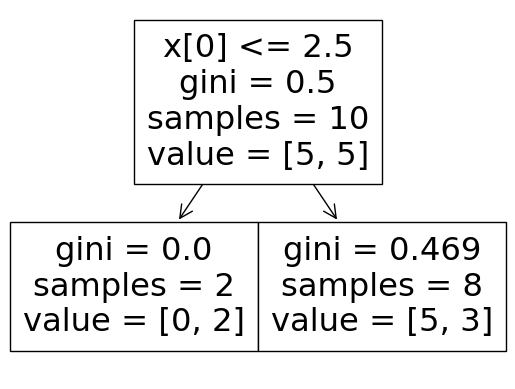

In [15]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

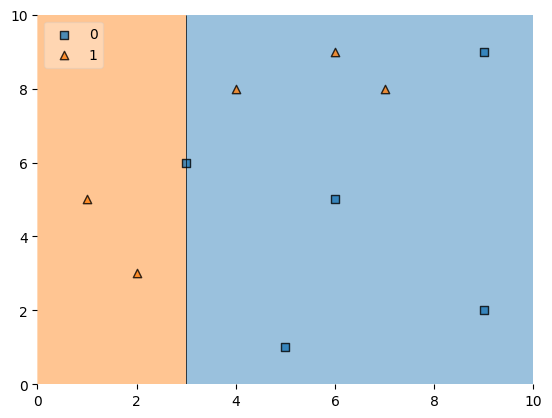

In [16]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [17]:
df['y_pred'] = dt1.predict(X)

In [18]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [20]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [21]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [22]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [25]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [26]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [27]:
df['updated_weights'].sum()

0.9165153319682015

In [28]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [29]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [30]:
df['nomalized_weights'].sum()

1.0

In [31]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [32]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [33]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [34]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [35]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [36]:
index_values = create_new_dataset(df)

index_values

[8, 6, 3, 3, 3, 7, 3, 1, 1, 2]

In [37]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [38]:
second_df

,X1,X2,label,weights
8,9,9,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1


In [39]:

dt2 = DecisionTreeClassifier(max_depth=1)
     

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
     

dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 5.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]')]

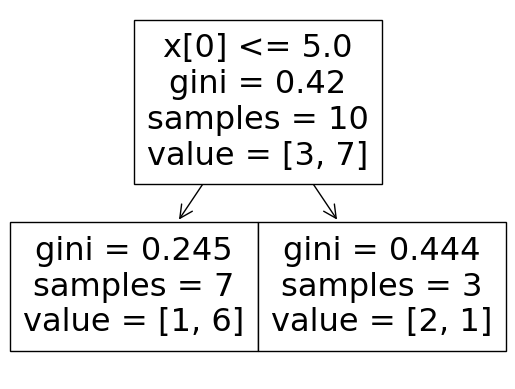

In [40]:
plot_tree(dt2)

<Axes: >

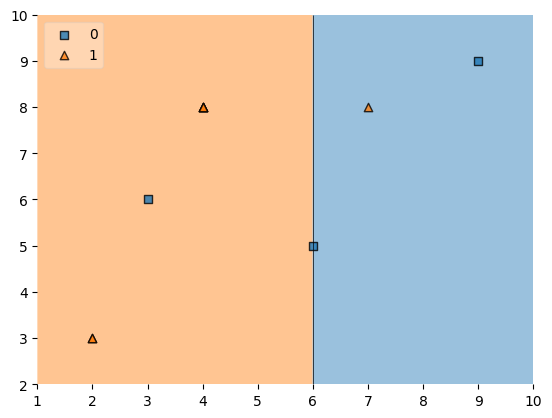

In [41]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [42]:
second_df['y_pred'] = dt2.predict(X)

In [43]:
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,0
3,4,8,1,0.1,1
1,2,3,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1


In [44]:
alpha2 = calculate_model_weight(0.1)

In [45]:
alpha2

1.0986122886681098

In [48]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [49]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [50]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,0,0.297427
3,4,8,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
1,2,3,1,0.1,1,0.033622
2,3,6,0,0.1,1,0.297427


In [61]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [62]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,normalized_weights
8,9,9,0,0.1,0,0.033622,0.038922,0.038922
6,6,5,0,0.1,0,0.033622,0.038922,0.038922
3,4,8,1,0.1,1,0.033622,0.038922,0.038922
3,4,8,1,0.1,1,0.033622,0.038922,0.038922
3,4,8,1,0.1,1,0.033622,0.038922,0.038922
7,7,8,1,0.1,0,0.297427,0.344313,0.344313
3,4,8,1,0.1,1,0.033622,0.038922,0.038922
1,2,3,1,0.1,1,0.033622,0.038922,0.038922
1,2,3,1,0.1,1,0.033622,0.038922,0.038922
2,3,6,0,0.1,1,0.297427,0.344313,0.344313


In [63]:
second_df['normalized_weights'].sum()

0.9999999999999999

In [64]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [65]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [66]:
second_df[['X1','X2','label','weights','y_pred','normalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,normalized_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,0,0.038922,0.000000,0.038922
6,6,5,0,0.1,0,0.038922,0.038922,0.077843
3,4,8,1,0.1,1,0.038922,0.077843,0.116765
3,4,8,1,0.1,1,0.038922,0.116765,0.155687
3,4,8,1,0.1,1,0.038922,0.155687,0.194608
7,7,8,1,0.1,0,0.344313,0.194608,0.538922
3,4,8,1,0.1,1,0.038922,0.538922,0.577843
1,2,3,1,0.1,1,0.038922,0.577843,0.616765
1,2,3,1,0.1,1,0.038922,0.616765,0.655687
2,3,6,0,0.1,1,0.344313,0.655687,1.000000


In [67]:
index_values = create_new_dataset(second_df)

In [68]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
     

third_df

,X1,X2,label,weights
1,2,3,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
3,4,8,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1


In [69]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

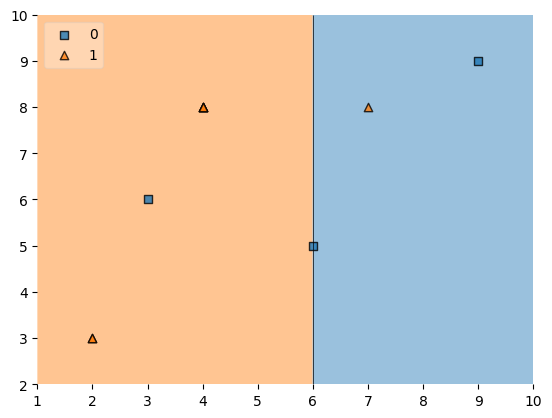

In [70]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [71]:
third_df['y_pred'] = dt3.predict(X)

In [72]:
third_df

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,0
3,4,8,1,0.1,0
3,4,8,1,0.1,1
1,2,3,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,0
1,2,3,1,0.1,1
3,4,8,1,0.1,1
1,2,3,1,0.1,1
1,2,3,1,0.1,1


In [73]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [74]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


## Prediction

In [75]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [76]:
dt2.predict(query)

array([1], dtype=int64)

In [77]:
dt3.predict(query)

array([1], dtype=int64)

In [78]:
alpha1*(1) + alpha2*(1) + alpha3*(1)

1.09861228866811

In [79]:
np.sign(1.09)

1.0

In [80]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([0], dtype=int64)

In [81]:
dt2.predict(query)

array([0], dtype=int64)

In [82]:
dt3.predict(query)

array([0], dtype=int64)

In [83]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)       #-1 for output is zero

-0.2513144282809062

In [84]:
np.sign(-0.251)      #0

-1.0

## steps for adaboost
1. take dataframe1 X,y,label colums
2. add weights equall distribute - 1/df1.shape[0]
3. train the model and add predicted output as new col name y_pred
4. now calculate the model weight of error means calculate alpha
5. update the new weights with the help of alpha and add in new column named update_weights
6. calculate the updated_weights.sum()
7. now create new column called normalized_weight and  add the division -  update_weights / updated_weights.(sum)
8. now recheck that the normalized_weight.(sum) should be ==1
9. now create new column called cumsum_upper for saving the cumulative sum of normalized_weights
10. create anoter new column called cumsum_lower for saving the difference of (cumsum_upper - normalized_weights )
11. select rows randomly with repetation from above df1 for creating new df
12. after selecting rows create new_df along with these rows and with basic columns - (X,y,label,weights)
13. repeate steps from 3 to 11 for n times
14. now we have n alpha for n dateframes
15. predict our query with each df 
16. now add the multiplication of alpha value with df for each -> alpha1*(query1_output) + alpha2*(query2_output) + alpha3*(query3_ouput)+......+ alphan*(queryn_output)
17. now check the sign of the final value using np.sign(addition of (alpha*query_output))
18. if sign -1 then output is 0 if sigh is +1 then output is 1